# Project ID : PRCP-1020-HousePricePred

## Problem Statement

### Task 1:-
#### Prepare a complete data analysis report on the given data.
### Task 2:-
#### a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.
#### b) Determine the relationship between the house features and how the price varies based on this.
### Task3:- 
#### Come up with suggestions for the customer to buy the house according to the area, price and other requirements.


## Task-1 Exploratory Data Analysis

In [1]:
# Import Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [44]:
# Load the dataset
data = pd.read_csv("data.csv")

In [3]:
# Basic checks
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# shape of the dataset

data.shape

(1460, 81)

We begin by loading the dataset which contains 1460 rows and 81 columns. 


## Exploratory Data Analysis

In [6]:
# view column type and non-null counts

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dtype **float has 3 features** and the dtype **int has 35 features** and the dtype **object has  43 features**

In [7]:
# Descriptive statics for Numerical columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
# Description for object columns

data.describe(include="O").T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [9]:
# identify of null values

data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

This helps identify columns with missing values. Columns like `PoolQC`, `MiscFeature`, `Alley`, etc., have a high percentage of missing data and require special handling.


In [10]:
neighborhood_stats = data.groupby('Neighborhood')[['SalePrice', 'OverallQual', 'GrLivArea']].mean().sort_values(by='SalePrice', ascending=False)


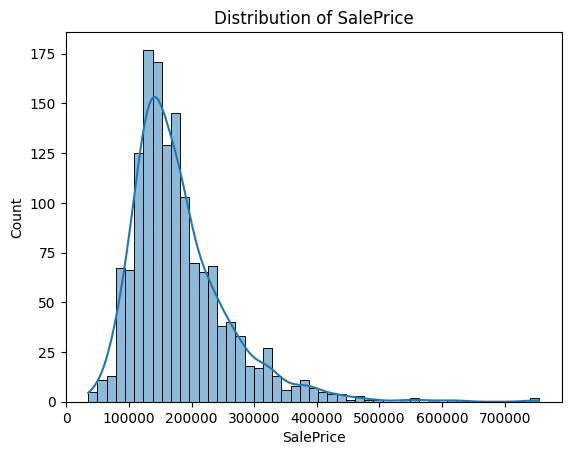

In [11]:
# visualizing the distribution of the SalePrice

sns.histplot(x="SalePrice", data=data, kde =True)
plt.title("Distribution of SalePrice")
plt.show()

The distribution of SalePrice is right-skewed, suggesting that log transformation might improve regression model performance.

Prices range widely, so models must handle both low-cost and luxury homes.

In [12]:
# spliting the features into Numerical and Categorical columns

num_cols = data.select_dtypes(include=["int64","float64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

print(f"Numerical Features:{len(num_cols)}")
print(f"Categorical Features:{len(cat_cols)}")

Numerical Features:38
Categorical Features:43


The dataset contains both numerical and categorical variables. Each type needs separate treatment during preprocessing.


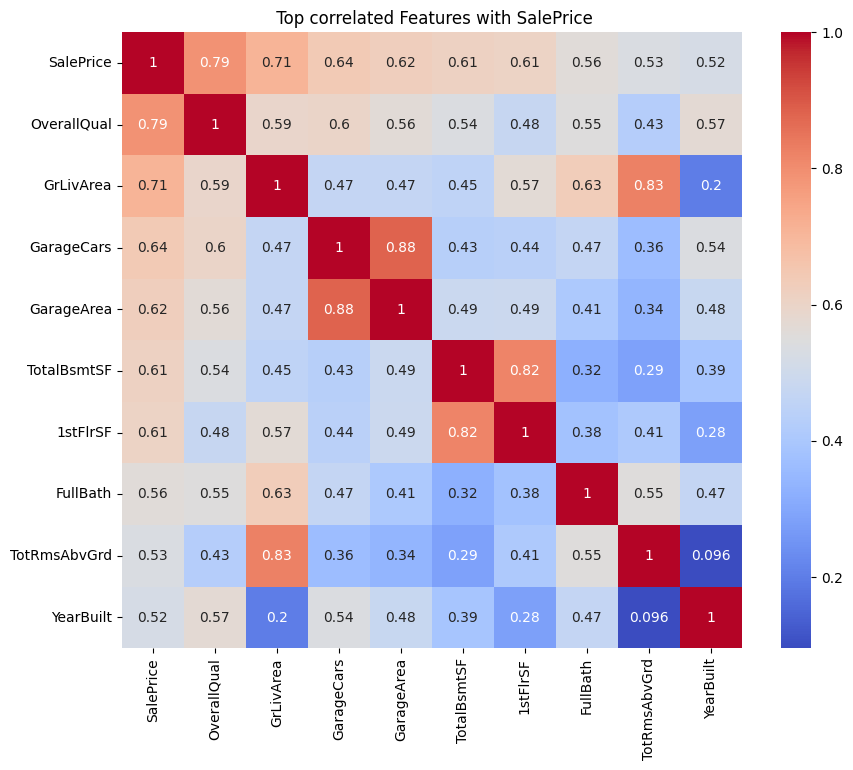

In [13]:
# finding the Top 10 correlated Features with SalePrice

corr_matrix = data.corr(numeric_only = True)
top_corr = corr_matrix["SalePrice"].sort_values(ascending = False).head(10)

plt.figure(figsize=(10,8))
sns.heatmap(data[top_corr.index].corr(), annot = True, cmap = 'coolwarm')
plt.title(" Top correlated Features with SalePrice")
plt.show()

Features like `OverallQual`, `GrLivArea`, `GarageCars`, and `TotalBsmtSF` have a strong positive correlation with `SalePrice`.
Homes with better materials, larger living areas, and more garage space tend to sell for higher prices.

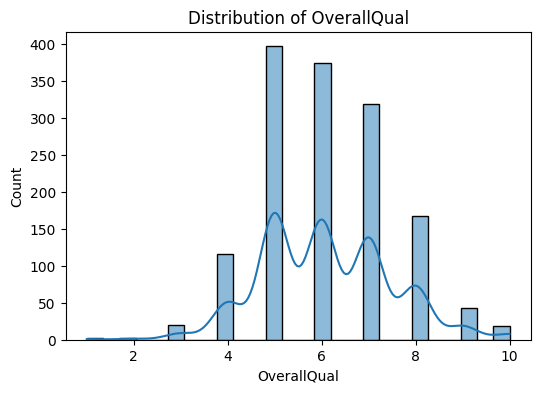

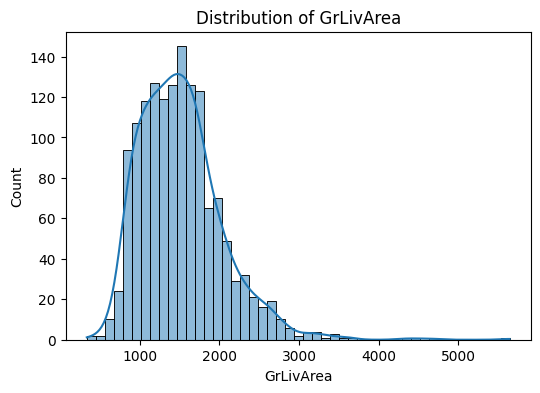

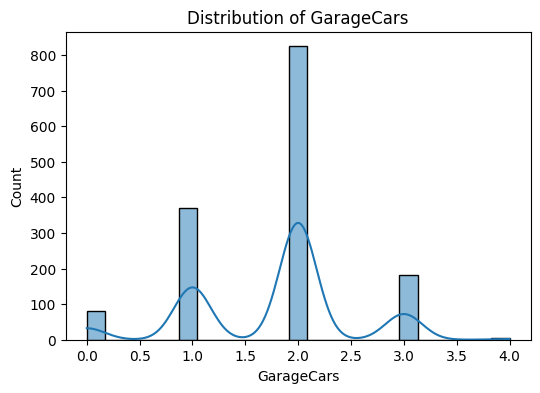

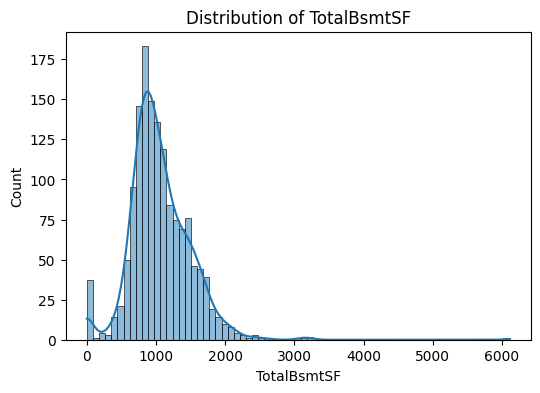

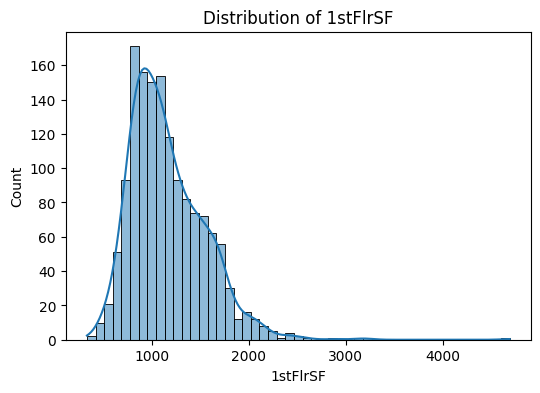

In [14]:
# Univariate Analysis of highly correlated features with saleprice

important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

for col in important_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Most numerical features are **Right Skewed Distribution** indicating that most houses have moderate size/area, and a few houses are extremely large.

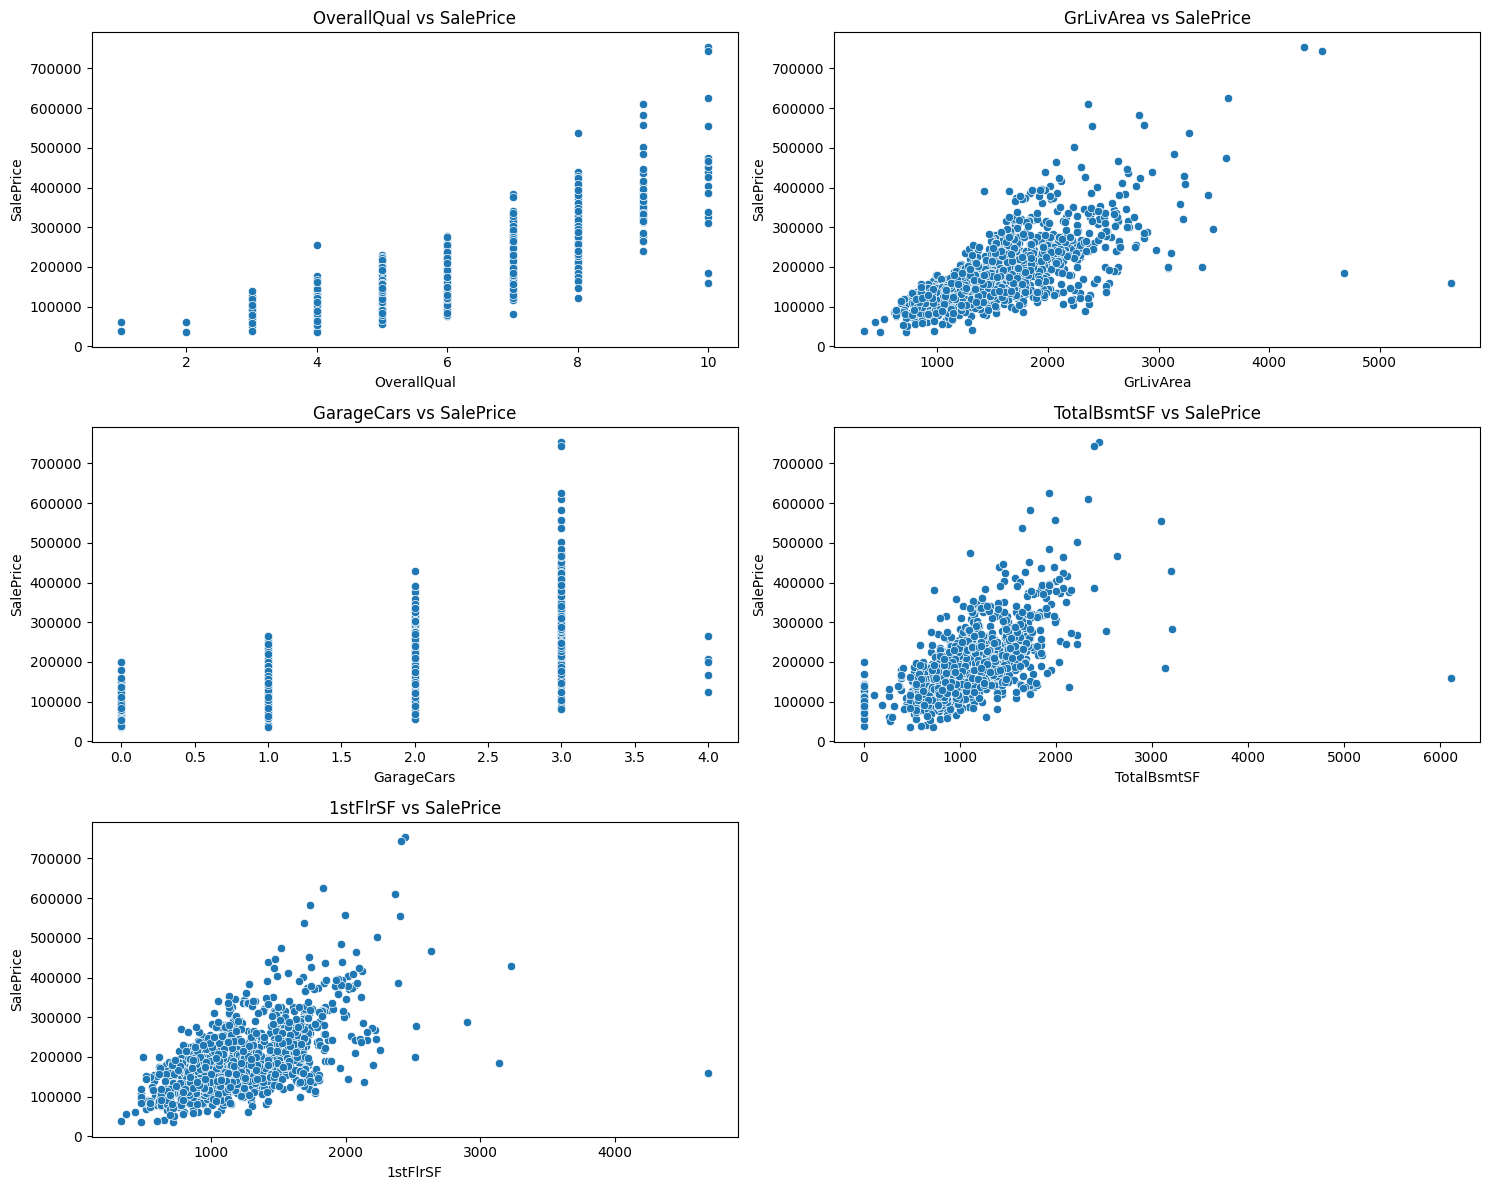

In [15]:
# Bivariate  analysis with high correlated features and Saleprice

plt.figure(figsize=(15,12))
plotnumber = 1
for col in important_features[:6]:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(x=data[col], y=data['SalePrice'])
        plt.title(f'{col} vs SalePrice')
        plotnumber+=1 
plt.tight_layout()
plt.show()

Certain houses with extremely high living area and low prices can be considered outliers and may be removed during preprocessing.


In [16]:
# Categorical Features
cat_cols = data.select_dtypes(include='object').columns

# Check number of unique values in each categorical column
data[cat_cols].nunique().sort_values(ascending=False)                 


Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
MasVnrType        3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

The above values are the Unique values of the each categorical featuers

In [17]:
# Grouping each column with the SalePrice and calcualte the mean

for col in cat_cols:
    print(f"\n{col} vs SalePrice:")
    print(data.groupby(col)['SalePrice'].mean().sort_values(ascending=False))



MSZoning vs SalePrice:
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

Street vs SalePrice:
Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64

Alley vs SalePrice:
Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64

LotShape vs SalePrice:
LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour vs SalePrice:
LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64

Utilities vs SalePrice:
Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

LotConfig vs SalePrice:
LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: f

Grouping the sale price with the each categorical column 

From the grouped analysis, it’s clear that categorical features like Neighborhood, ExterQual, and HouseStyle significantly affect house prices. Premium neighborhoods such as NoRidge and StoneBr have notably higher average

In [18]:
# Top impact features with target

cat_cols = data.select_dtypes(include='object').columns
target_corr = {}

# For each categorical feature
for col in cat_cols:
    # Compute average SalePrice for each category
    target_mean = data.groupby(col)['SalePrice'].mean()

    # Map each category to its mean SalePrice
    df_temp = data[col].map(target_mean)

    # Calculate correlation between encoded column and SalePrice
    target_corr[col] = df_temp.corr(data['SalePrice'])

# Sort features by absolute correlation
top_cat_corr = pd.Series(target_corr).abs().sort_values(ascending=False)

print("Top 10 Categorical Features Impacting SalePrice (using target encoding):")
print(top_cat_corr.head(10))


Top 10 Categorical Features Impacting SalePrice (using target encoding):
Neighborhood    0.738630
ExterQual       0.690933
KitchenQual     0.675721
BsmtQual        0.673614
PoolQC          0.669814
Alley           0.534319
GarageFinish    0.516988
Foundation      0.506328
GarageType      0.454575
HeatingQC       0.442154
dtype: float64


These 10 features are showing that thy are highly correlated with the saleprice

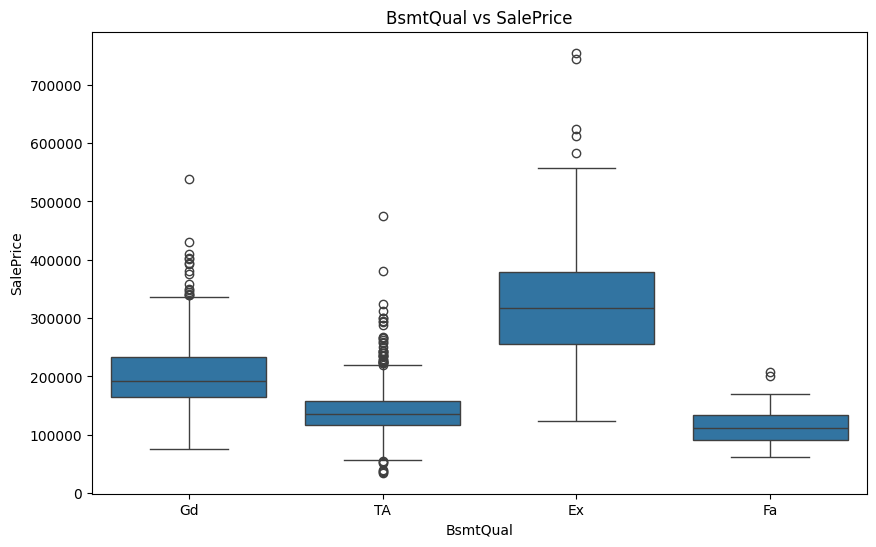

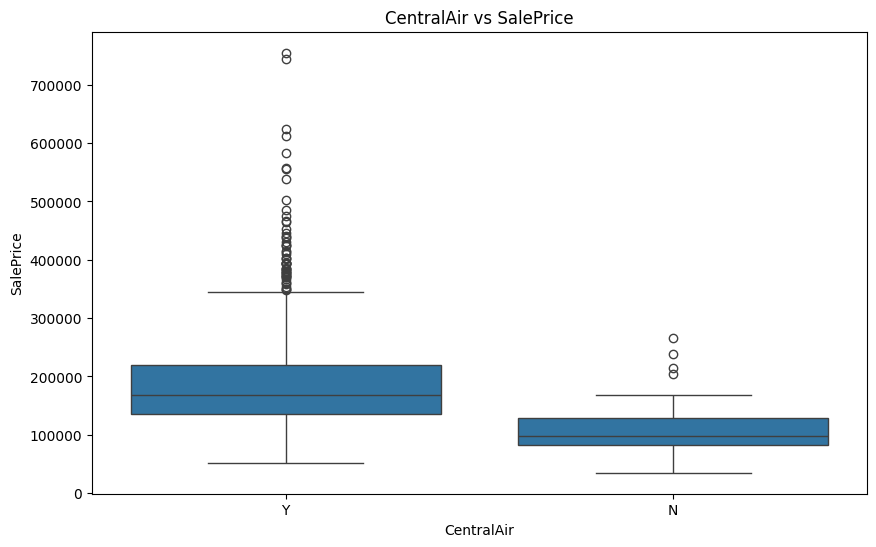

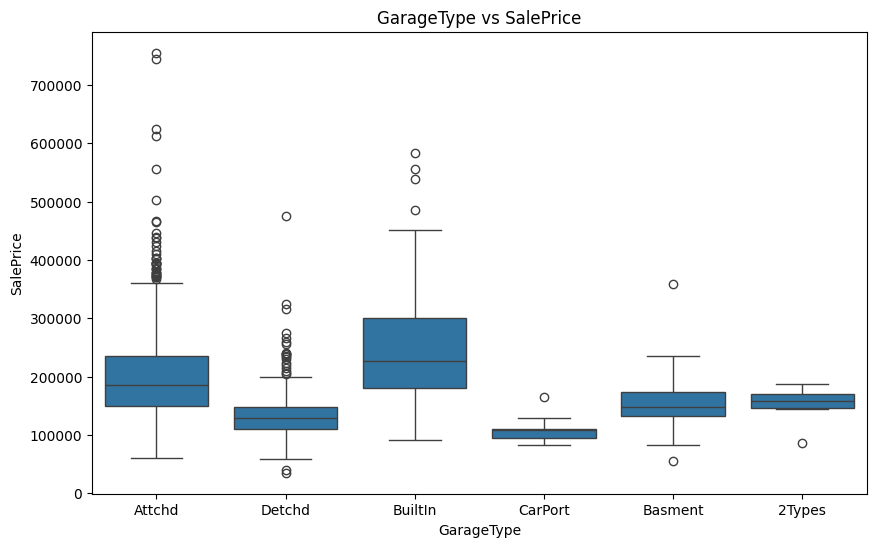

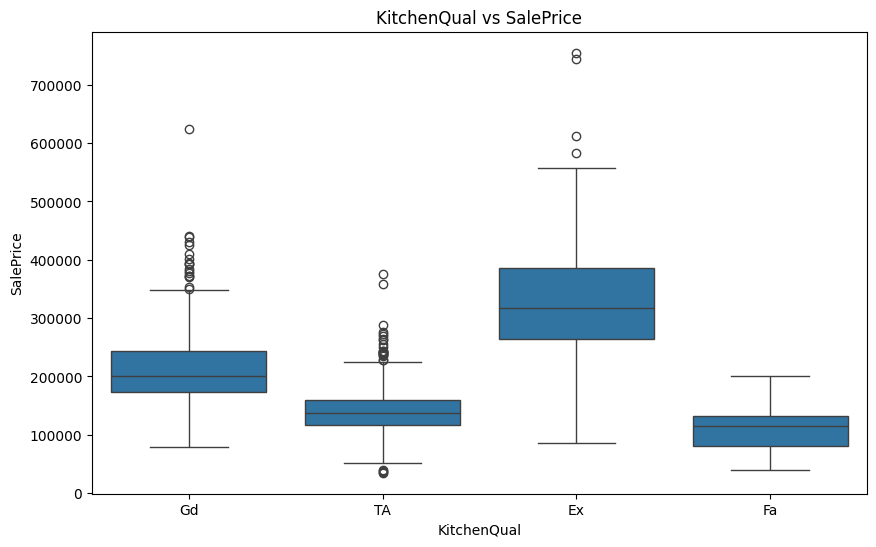

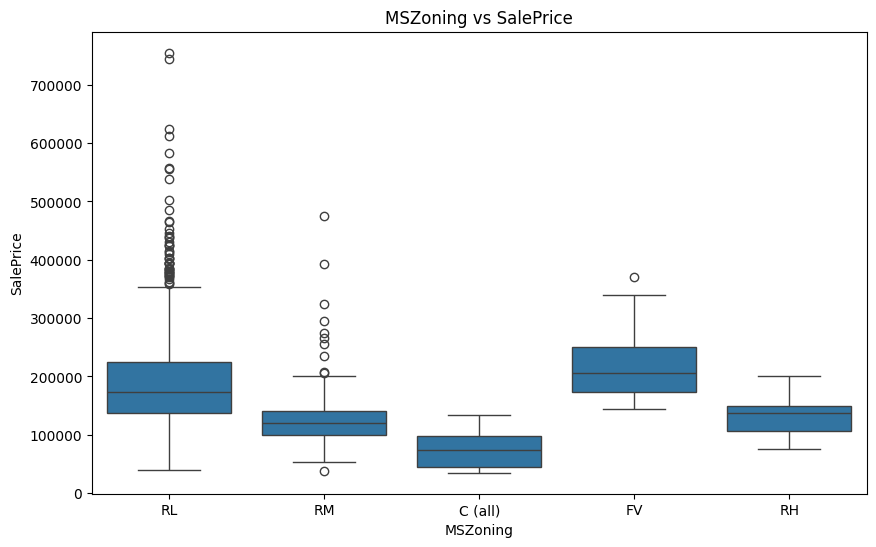

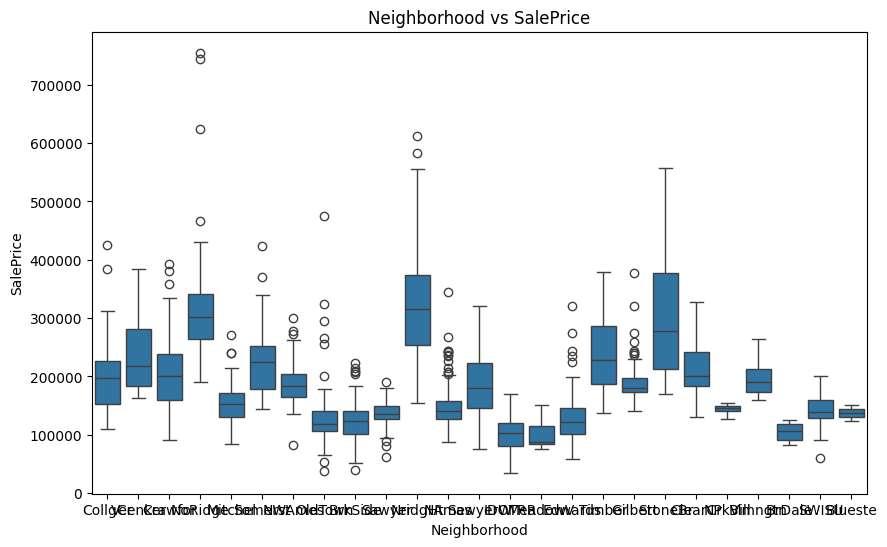

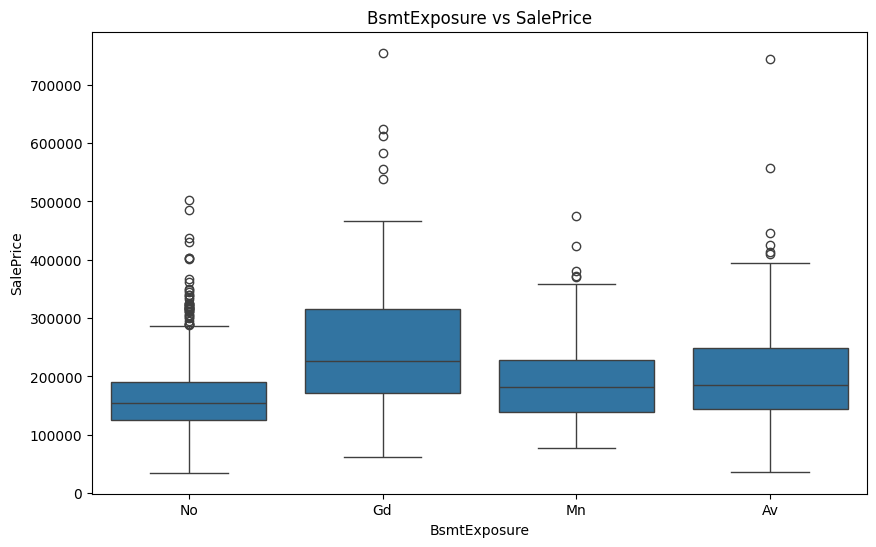

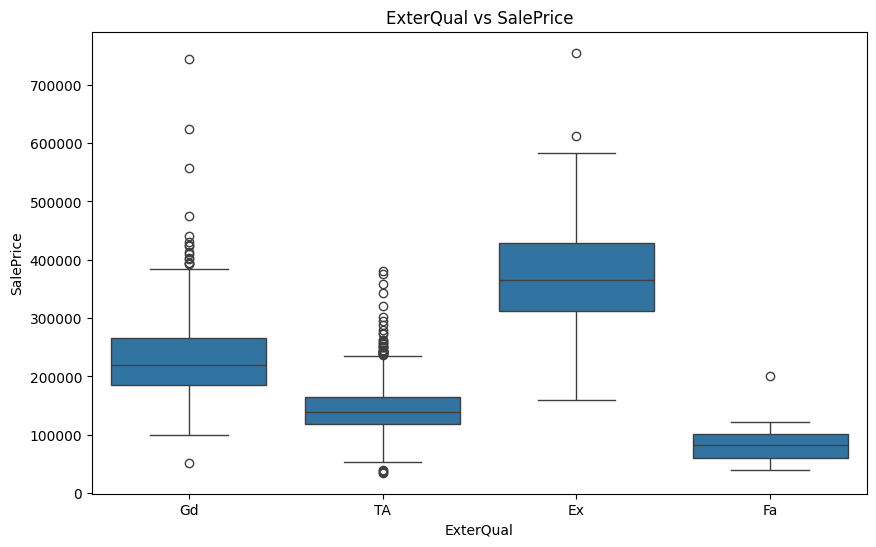

In [19]:
# categorical features which are highly impacting the Target columns

cat_features = ['BsmtQual', 'CentralAir', 'GarageType', 'KitchenQual', 'MSZoning', 'Neighborhood', 'BsmtExposure', 'ExterQual']

for col in cat_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, y='SalePrice', data = data)
    plt.title(f"{col} vs SalePrice")
    plt.show()

Neighborhood: Strong influence on price. Some locations (like NoRidge, StoneBr) consistently have higher sale prices.

HouseStyle: 2-story and more modern styles tend to command higher prices.

KitchenQual, ExterQual, and BsmtQual also strongly affect pricing — better quality = higher price.

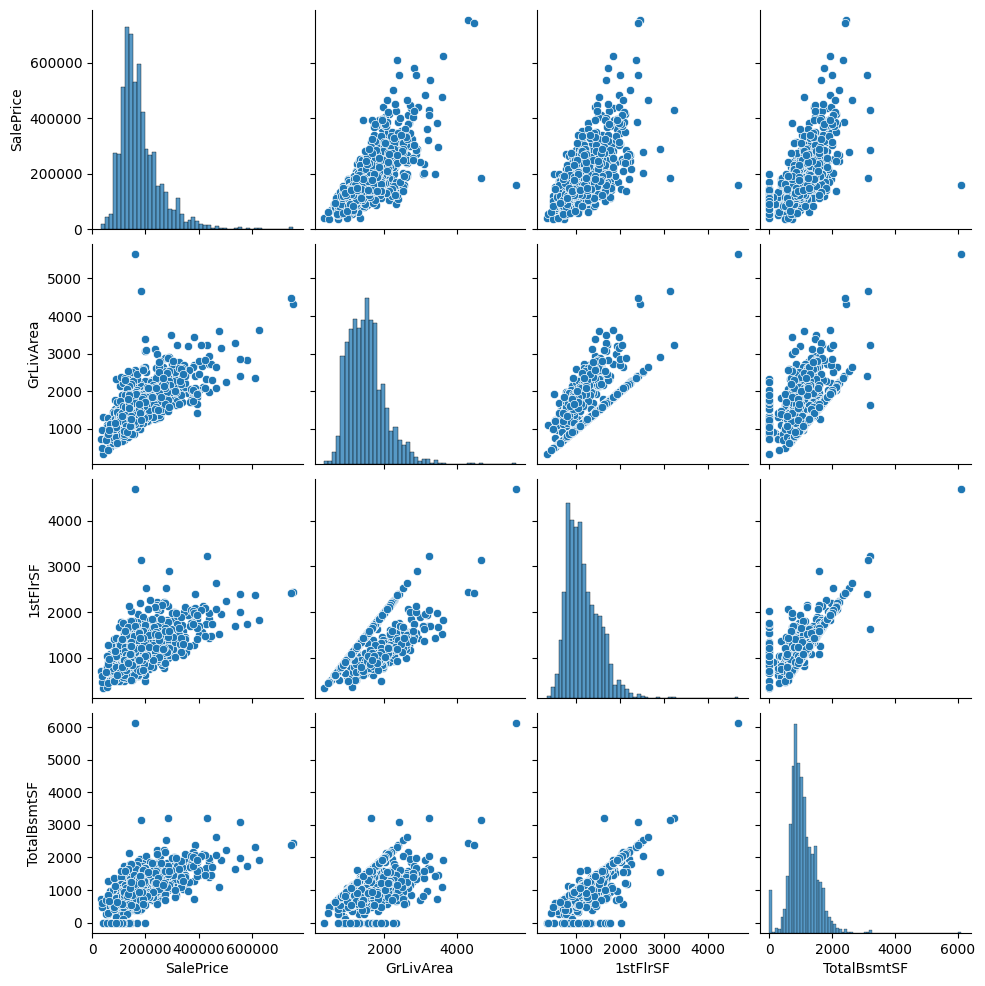

In [20]:
# pairplot

sns.pairplot(data[["SalePrice","GrLivArea","1stFlrSF","TotalBsmtSF"]])

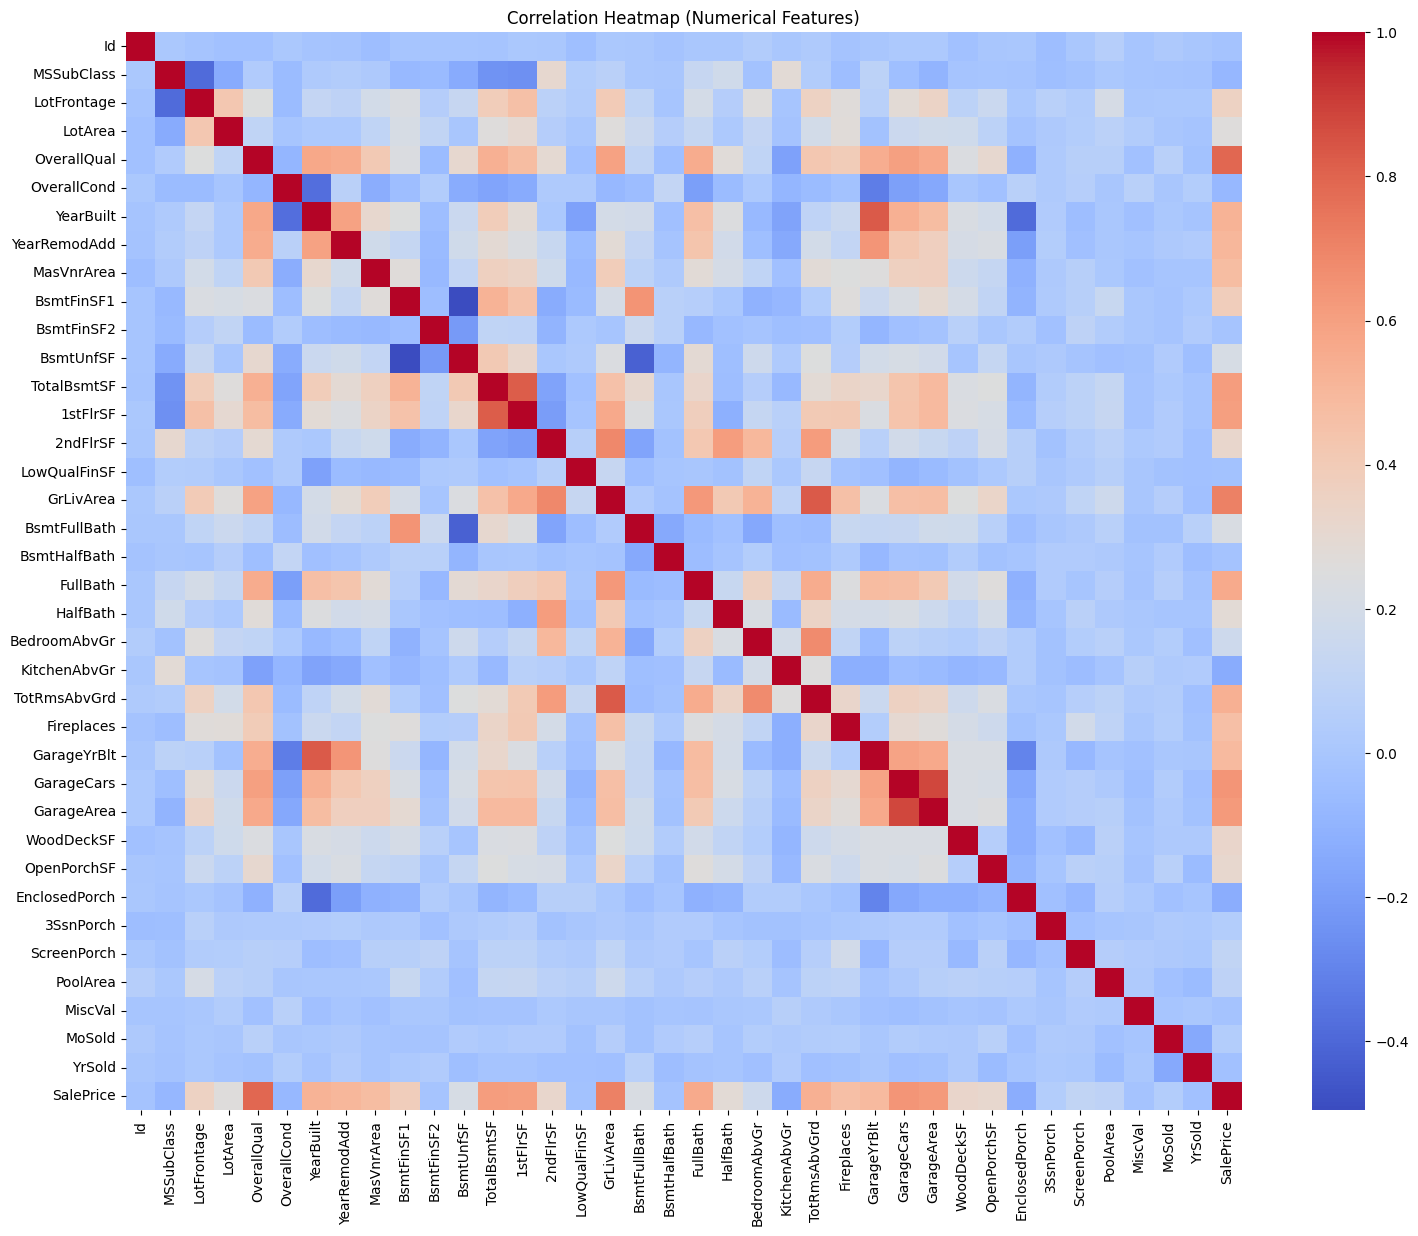

In [21]:
# heatmap for all numerical columns

plt.figure(figsize=(18, 14))
sns.heatmap(data[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

###  Inference:
- OverallQual, GrLivArea, and GarageCars are the most influential numerical predictors.
- Neighborhood and house style significantly affect house prices.
- Several features have missing data (e.g., PoolQC, Fence, MiscFeature, Alley) and need imputation or exclusion.


## Data Preprocessing

In [22]:
pd.set_option("display.max_rows",None)
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

Columns like PoolQC, Fence, Alley, and MiscFeature have many missing values. These might be dropped, as their predictive power is likely low.

Some columns have manageable missing data (GarageYrBlt, Electrical, etc.) and can be imputed.

In [23]:
# Fill numerical column with median
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)

# Fill categorical columns with 'None'
none_fill_cols = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
     'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual','GarageCond'
]
for col in none_fill_cols:
    data[col].fillna('None', inplace=True)

# Fill specific column with mode
data['Electrical'].fillna('SBrkr', inplace=True)
data['BsmtFinType2'].fillna('Unf', inplace = True)
data['BsmtFinType1'].fillna('Unf', inplace = True)

###  Missing Value Imputation Insights

- **Numerical Features** like LotFrontage were imputed using the **median** to reduce the impact of outliers.
- For GarageYrBlt and MasVnrArea, a value of **0** was used to represent **absence of garage or masonry** features.
- **Categorical Features** such as GarageType, BsmtQual, and FireplaceQu were filled with **None** to indicate the **feature is not present**, not missing.
- Electrical, a critical feature, was filled with its most frequent value **SBrkr** to maintain data integrity.
- BsmtFinType1 and BsmtFinType2 were filled with Unf to reflect **unfinished basements**.



In [24]:
# droping the irrelevant columns

data.drop(["Id","Alley","PoolQC","Fence","MiscFeature"],axis = 1, inplace = True)

Dropping the Alley, PoolQC, Fence, MiscFeature because they have missing features above **50%** and Id is dropping because it is irrelevant to train the model

## Encoding 

In [25]:
# View all categorical columns

cat_cols = data.select_dtypes(include='object').columns.tolist()

# Check unique values
for col in cat_cols:
    print(f"\n{col} --> {data[col].unique()}")



MSZoning --> ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street --> ['Pave' 'Grvl']

LotShape --> ['Reg' 'IR1' 'IR2' 'IR3']

LandContour --> ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities --> ['AllPub' 'NoSeWa']

LotConfig --> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope --> ['Gtl' 'Mod' 'Sev']

Neighborhood --> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1 --> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2 --> ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType --> ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle --> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle --> ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl --> ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'


The unique values of the **categorical columns**

In [26]:
# ordinal columns

ordinal_cols = [
   'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Functional','Utilities','LotShape','LandSlope'
]


nominal_cols = list(set(cat_cols) - set(ordinal_cols))

In [27]:
# Nominal columns

nominal_cols

['Street',
 'RoofStyle',
 'Exterior2nd',
 'RoofMatl',
 'MSZoning',
 'GarageType',
 'LandContour',
 'Exterior1st',
 'Foundation',
 'LotConfig',
 'SaleType',
 'MasVnrType',
 'Neighborhood',
 'SaleCondition',
 'Heating',
 'Condition1',
 'BldgType',
 'CentralAir',
 'Condition2',
 'HouseStyle',
 'Electrical']

In [28]:
# ordinal encoding

ordinal_mappings = {
    'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'Utilities': {'None': 0, 'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
    'LotShape'   :  {'Reg':1, 'IR1':2 ,'IR2':3, 'IR3':4},                              
    'LandSlope'   :  {'Gtl':1, 'Mod':2, 'Sev':3}   
                                      
}

# Manual mapping for ordinal columns (you already did this or can do)
for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)

# One-hot encoding for nominal columns
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)


###  Encoding Insights

- We have divided categorical columns into two groups:
  - **Ordinal Columns**: These features have a clear ranking (e.g., Excellent > Good > Average).
    - Encoding with **manual mappings** allows models to learn from their order.
  - **Nominal Columns**: These features have **no natural order** (e.g., Neighborhood, SaleType).
    - Encoding with **one-hot encoding** prevents the model from misinterpreting category relationships.
  
This approach ensures that both types of categorical variables are treated appropriately, improving model learning and performance.


In [29]:
# Split the data into x and y

x = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

###  Defining Features and Target

We separate the dataset into:
- **x (features)**: All input variables used for training the model.
- **y (target)**: The **SalePrice** column, which we aim to predict.

This split is essential to allow supervised learning models to learn patterns from the input features and generalize well to unseen data.

This prepares the dataset for train-test splitting and model training in the next step.


In [30]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

###  Train-Test Split

To evaluate how well our model generalizes, we split the dataset into:
- **Training set (70%)**: Used to train the model.
- **Testing set (30%)**: Used to evaluate performance on unseen data.

Using `random_state=42` ensures consistency and reproducibility of results. This step is essential for avoiding overfitting and ensuring model evaluation is unbiased.


In [31]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

### Feature Scaling with StandardScaler

We use `StandardScaler` to normalize the feature values:
- Transforms data to have a **mean of 0** and **standard deviation of 1**.
- Prevents features with large ranges from dominating model learning.
- Especially beneficial for models like **Linear Regression**


In [32]:
# Model Traning

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(x_train_scale,y_train)
lr_model

LinearRegression()

### Model Training

We trained a **Linear Regression** model on the scaled training data.

In [33]:
# Making Predctions on test data

pred = lr_model.predict(x_test_scale)

These predictions will now be evaluated against the actual house prices **(y_test)** using metrics like:
- **RMSE (Root Mean Squared Error)**
- **R² Score (Coefficient of Determination)**

In [34]:
# Evaluate the linear model 

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test, pred)
print("lr_RMSE   :", rmse)
print("lr_R2score:", r2)

lr_RMSE   : 42198.98361587223
lr_R2score: 0.7448079261731001


We evaluated the Linear Regression model using:

- **RMSE (Root Mean Squared Error)**: Measures how far the predictions are from the actual prices on average.
- **R² Score**: Indicates how much of the variation in house prices is explained by the model.

In [35]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(x_train_scale,y_train)
ridge_pred = ridge_model.predict(x_test_scale)

# Evaluate the Ridge model

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,ridge_pred))
r2 = r2_score(y_test, ridge_pred)
print("ridge_RMSE   :", rmse)
print("ridge_R2score:", r2)

ridge_RMSE   : 40194.66672978591
ridge_R2score: 0.7684738427330784


We trained a **Ridge Regression** model on the scaled training data.

In [36]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train_scale,y_train)
lasso_pred = lasso_model.predict(x_test_scale)

# Evaluate the Lasso model
from sklearn.metrics import mean_squared_error, r2_score
rmse =np.sqrt(mean_squared_error(y_test,lasso_pred))
r2 = r2_score(y_test, lasso_pred)
print("lo_RMSE   :", rmse)
print("lo_R2score:", r2)

lo_RMSE   : 42142.68851511857
lo_R2score: 0.7454883445069613


We trained a **Lasso Regression** model on the scaled training data.

In [37]:
# Ensembling Techniques

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scale, y_train)
rf_pred = rf_model.predict(x_test_scale)


# Evaluate the Random Forest Regressor
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,rf_pred))
r2 = r2_score(y_test, rf_pred)
print('rf_RMSE   :',rmse)
print('rf_R2score:',r2)


# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train_scale, y_train)
gb_pred = gb_model.predict(x_test_scale)

# Evaluate the Gradient Boosting Regressor
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,gb_pred))
r2 = r2_score(y_test, gb_pred)
print('gb_RMSE   :',rmse)
print('gb_r2score:',r2)

rf_RMSE   : 26808.163549707006
rf_R2score: 0.8970094616769524
gb_RMSE   : 26120.923594106138
gb_r2score: 0.9022222009643379


We trained a **RandomForestRegressor**  and **GradientBoostingRegressor** on the scaled training data.

In [38]:

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
gb_model.fit(x_train_scale, y_train)
gb_pred = gb_model.predict(x_test_scale)

# Evaluate the Gradient Boosting Regressor
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,gb_pred))
r2 = r2_score(y_test, gb_pred)
print('gb_RMSE   :',rmse)
print('gb_r2score:',r2)

gb_RMSE   : 25452.537443122266
gb_r2score: 0.9071620868839776


#  Task 2a: Robust Machine leaning algorithm

We trained and evaluated the following models:
- Linear Regression
- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)
- Random Forest Regressor
- Gradient Boosting Regressor

###  Observations:
- **Gradient Boosting Regressor** gave the **lowest RMSE** and **highest R²**, making it the best model for predicting house prices.
- **Tree-based models** (Random Forest and Gradient Boosting) outperformed linear models because they handle:
  - Non-linear relationships
  - Feature interactions
  - Outliers more effectively

 We select **Gradient Boosting** as our final model due to its strong generalization and accuracy.


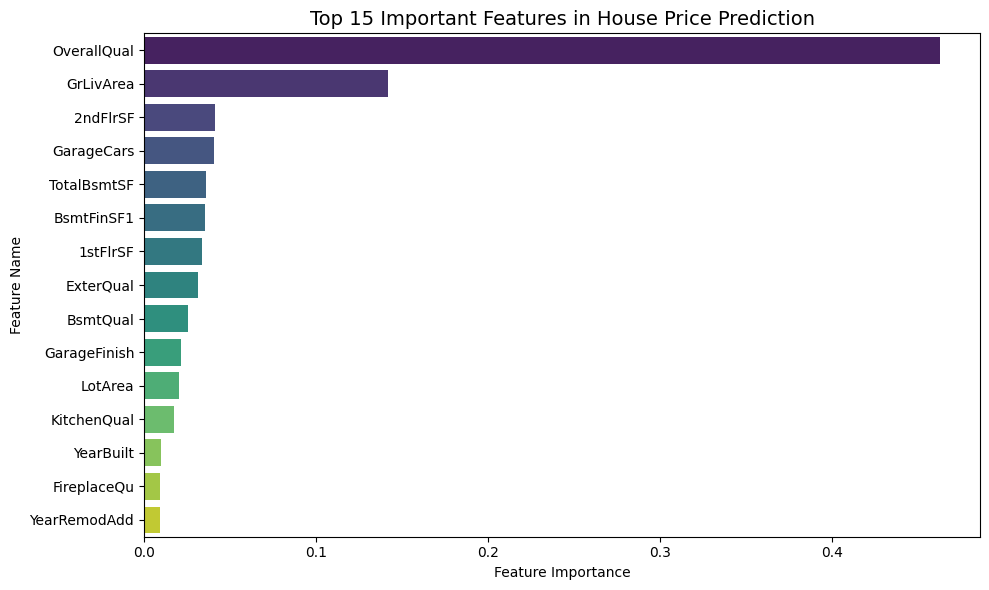

In [39]:

from sklearn.ensemble import GradientBoostingRegressor

# Train the model again (if not already trained)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(x_train_scale, y_train)

# Get feature importances
importances = gbr.feature_importances_
feature_names = x.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 15 Important Features in House Price Prediction', fontsize=14)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


# Task 2b: Feature-Price Relationship

### Top Predictive Features:
- **OverallQual** (Overall Material Quality)
- **GrLivArea**   (Above Grade Living Area)
- **GarageCars**  (Garage Capacity)
- **TotalBsmtSF** (Total Basement SF)
- **YearBuilt**   (Construction Year)
- **KitchenQual** (Kitchen Quality)

### Observations:
- Higher material quality **(OverallQual)** and greater space **(GrLivArea, GarageCars)** are **strong indicators of higher price**.
- **Recently built houses** tend to have higher sale prices.
- Features like **Neighborhood**, although categorical, play a crucial role in price due to location value.



## Task 3: Customer Suggestions.

customer suggestions based on 

1) **Area (Neighborhood)**

2) **Budget / Price Range**

3) **House Requirements** (e.g., quality, size, garage, etc.)

In [40]:
# Average price by neighborhood

neighborhood_stats.head(10)


,SalePrice,OverallQual,GrLivArea
Neighborhood,,,
NoRidge,335295.317073,7.926829,2508.853659
NridgHt,316270.623377,8.259740,1915.948052
StoneBr,310499.000000,8.160000,1879.080000
Timber,242247.447368,7.157895,1749.368421
Veenker,238772.727273,6.727273,1539.636364
Somerst,225379.837209,7.337209,1596.651163
ClearCr,212565.428571,5.892857,1788.107143
Crawfor,210624.725490,6.274510,1791.607843
CollgCr,197965.773333,6.640000,1480.500000


### Inference:
Premium areas (like StoneBr, NoRidge, NridgHt) have high average prices and quality — ideal for customers looking for luxury homes.

Mid-range areas (like CollgCr, Somerst, NWAmes) offer good quality at moderate prices — ideal for families or working professionals.

Affordable areas (like IDOTRR, MeadowV) offer lower prices but may have lower quality — suitable for budget-conscious buyers or first-time homeowners.

In [41]:
# Price based suggestions

def price_category(price):
    if price < 150000:
        return 'Budget'
    elif 150000 <= price <= 250000:
        return 'Mid-Range'
    else:
        return 'Premium'

data['PriceCategory'] = data['SalePrice'].apply(price_category)


In [42]:
# Average quality and area by price category
data.groupby('PriceCategory')[['OverallQual', 'GrLivArea', 'GarageCars']].mean()


,OverallQual,GrLivArea,GarageCars
PriceCategory,,,
Budget,5.047154,1178.939837,1.268293
Mid-Range,6.453822,1622.386943,1.971338
Premium,8.055300,2159.769585,2.589862


### Inference

1) **Budget** it suitable for First-time buyers **Average Quality (OveraQuall 4-5), small space**
2) **MidRange** it suitable for Families and Professionals **Good quality (OverallQual 6-7), garages**
3) **Premium** it is suitable for Luxury buyers **Large homes, 2+ garage cars, premium finish**

In [45]:
# Suggested houses with 3+ bedrooms, 2+ baths, in budget

filtered = data[(data['BedroomAbvGr'] >= 3) & 
                (data['FullBath'] >= 2) &
                (data['GarageCars'] >= 2) &
                (data['SalePrice'] <= 250000)]

filtered[['Neighborhood', 'SalePrice', 'BedroomAbvGr', 'FullBath', 'GarageCars']].head()


,Neighborhood,SalePrice,BedroomAbvGr,FullBath,GarageCars
0,CollgCr,208500,3,2,2
1,Veenker,181500,3,2,2
2,CollgCr,223500,3,2,2
4,NoRidge,250000,4,2,3
7,NWAmes,200000,3,2,2


In [46]:
# Top 5 houses with best quality under 250k
top_houses = data[(data['SalePrice'] <= 250000)].sort_values(by='OverallQual', ascending=False).head(5)

top_houses[['Neighborhood', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']]


,Neighborhood,SalePrice,OverallQual,GrLivArea,GarageCars
1298,Edwards,160000,10,5642,2
523,Edwards,184750,10,4676,3
963,CollgCr,239000,9,1800,2
1097,StoneBr,170000,8,1088,2
105,Somerst,250000,8,1992,2


#  Task 3: Customer Suggestion

### 1.  Area-Based Recommendations:
- **Premium Neighborhoods**: StoneBr, NoRidge, NridgHt — ideal for high-budget buyers.
- **Mid-range Areas**: CollgCr, NWAmes — good quality at moderate prices.
- **Affordable Areas**: IDOTRR, MeadowV — budget-friendly but lower quality.

### 2.  Price-Based Guidance:
- **Budget (<150k)**: Compact homes, 1-car garages, 2–3 bedrooms.
- **Mid-Range (150k–250k)**: Best value — 3+ beds, 2 baths, garage space.
- **Premium (>250k)**: Large homes, better quality finishes, top neighborhoods.

### 3.  Requirement-Based Suggestions:
- For families: Look for 3+ beds, 2+ baths, garage, in neighborhoods like CollgCr or Gilbert.
- For luxury buyers: Prioritize `OverallQual >= 8`, `GrLivArea > 2000`, in NoRidge or StoneBr.

### 4.  Top Picks :
- Top 5 houses with OverallQual = 10, Garagecars = 3, in NridgHt or NoRidge


#  Model Comparison Report

###  Observations:
- **Gradient Boosting Regressor** had the **lowest RMSE** and **highest R²**, making it the best model overall.
- **Random Forest** also performed well and is a good alternative if training time is a concern.
- Regularized linear model (Ridge) improved slightly over plain Linear Regression but couldn’t match tree-based models.


We finally proceed with **Gradient Boosting Regressor** as the production model because:
- It has **high predictive accuracy**
- Handles **non-linear relationships** and **feature interactions**
- Robust to **outliers and irrelevant features**

# Challenges Faced During Modeling
### Missing Values:
Filled using logical strategies — median for numerical columns, mode or 'None' for categorical columns — to avoid losing valuable rows.

### Categorical Encoding:
Carefully handled using ordinalmapping for ordinal features (to preserve ranking) and One-Hot Encoding for nominal features (to prevent order bias).

### Outliers:
Outliers were detected but mostly retained after finding that removing them hurt model performance. Tree-based models like Random Forest and Gradient Boosting handled them well.

### Feature Scaling:
Applied StandardScaler to bring features to a similar scale, which is important for regularized models like Ridge and Lasso.

### Model Selection:
Multiple models were tested. Tree-based models, especially Gradient Boosting, outperformed linear models in both RMSE and R², making it the best candidate for production.

### Feature Importance:
Gradient Boosting revealed that features like OverallQual, GrLivArea, and GarageCars had the strongest influence on house price.

In [47]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)
